# Customer Behaviour Analysis



### 🧠 Hypotheses:

- **H4 (Revenue & Churn Financial Hypothesis):**  
  Customer dissatisfaction directly translates into lost revenue, higher churn rates, lower lifetime value, and long-term business losses.



### 📊 BI Questions & Hypotheses Mapping

| BI Question | Related Hypothesis | Business Insight |
|------------|--------------------|------------------|
| How many customers leave reviews? | H4 | Measures engagement and feedback volume |
| How does review sentiment affect repeat behavior? | H4 | Links satisfaction to repurchase patterns |
| What happens to customer LTV when reviews are poor? | H4 | Quantifies long-term revenue risk from dissatisfaction |
| What % of revenue comes from repeat customers? | H4 | Highlights financial dependence on loyalty |
| Who are the top 10% of customers by revenue and frequency? | H4 | Identifies VIP segments to protect and grow |



### 🧮 Modeling Assumptions Declaration

| Initiative | Assumption Basis | Reason for Assumption |
|-----------|------------------|------------------------|
| Lost Revenue from Low Review Orders | Avg order value: **229.81 BRL** × 16,272 orders → **$3,739,501 BRL ≈ $673,110 USD** | Based on actual BI query on Negative (1–2) sentiment |
| Customer Churn Loss | Churn rate: **35%**, CLTV: **1,200 BRL** → **$6,826,000 BRL ≈ $1,228,680 USD** | Conservative churn assumption applied to dissatisfied buyers |
| Operational Cost Savings | 4.50 BRL saved/order → **$73,224 BRL ≈ $13,180 USD** | Estimated reduction in support, return handling, and complaint cost |




### 💰 Dollars & Cents Framing (in USD)

| BI Question | Scenario | Metric | Estimated $$$ Impact (USD) |
|-------------|----------|--------|-----------------------------|
| What happens to customer LTV when reviews are poor? | Lost revenue from low-rated orders (1–2 stars) | 229.81 × 16,272 | **$673,110** |
| How does review sentiment affect repeat behavior? | Lifetime churn loss (future purchases lost) | 0.35 × 1,200 × 16,272 | **$1,228,680** |
| What % of revenue comes from repeat customers? | Operational cost savings | 4.50 × 16,272 | **$13,180** |
| — | **Total business opportunity** | — | **$1,914,970** |


### 🧪 Hypothesis Testing & Discussion

#### H4 (Customer Satisfaction Drives Revenue Loss) — **Strongly Supported**

- ✅ Negative reviews only ~16% of total orders, but avg value is **229.81 BRL ≈ $41.37** — highest of all groups.
- ✅ Revenue from happy customers (84k orders) = **13.9M BRL ≈ $2.5M**, but even small % churn = **big losses**.
- ✅ Churn rate assumed at **35%**, contributing over **$1.2M USD** in LTV loss.
- ✅ Top product categories (e.g., PCs, Coffee Makers) show **high spend, low retention risk** if satisfaction isn’t protected.
- ✅ Customers in the negative sentiment group had the highest average LTV but were least likely to return (repeat rate = 1.89%).
- ✅ Despite high spend, dissatisfaction among this group indicates significant LTV loss risk if left unaddressed. 
- ✅ Even small churn percentages among high-value groups can lead to disproportionate revenue loss. 
- ✅ Positive sentiment does not necessarily correlate with high spending, highlighting the need to monitor both satisfaction and behavioral value.S

### 🎯 Action Plan — Customer Satisfaction & Retention

**🎯 Objective:**  
Reduce churn, protect high-value customer segments, and improve satisfaction across the purchase journey.

---

### 1. Post-Purchase Feedback Campaign

✅ **Problem:** Many customers don’t leave reviews unless unhappy  
✅ **Impact:** Engagement leads to fewer hidden negatives  
✅ **Action:** Trigger NPS survey or feedback form after delivery  
✅ **Cost:** $9,000  
✅ **Revenue Recovered:** ~$45,000

---

### 2. Negative Review Recovery Workflow

✅ **Problem:** High-value customers leave 1–2 star reviews and churn silently  
✅ **Impact:** Risk of losing LTV from premium buyers  
✅ **Action:** Auto-flag bad reviews, trigger CS outreach or coupon  
✅ **Cost:** $13,500  
✅ **Revenue Protected:** ~$90,000

---

### 3. QA Improvements – High Value Categories

✅ **Problem:** PCs and electronics → highest value, volatile satisfaction  
✅ **Action:** Improve supplier QA, packaging, and pre-delivery checks  
✅ **Cost:** $21,600  
✅ **Revenue Recovered:** ~$135,000

---

### 4. Customer Retention Program

✅ **Problem:** Churn post-delivery is invisible but costly  
✅ **Action:** Implement loyalty tiers, win-back campaigns, early access perks  
✅ **Cost:** $17,100  
✅ **Revenue Protected:** ~$216,000

---

### 5. Delivery & Fulfillment Monitoring

✅ **Problem:** Delays tied to low review scores  
✅ **Action:** Alert system for late deliveries + CS notification  
✅ **Cost:** $10,800  
✅ **Savings:** ~$54,000

---

### 📌 High-Level Summary (USD)

| Initiative | Cost (USD) | Annual Benefit (USD) | Upside (USD) |
|-----------|------------|-----------------------|--------------|
| Feedback Campaign | $9,000 | $45,000 | $36,000 |
| Review Recovery | $13,500 | $90,000 | $76,500 |
| QA Improvements | $21,600 | $135,000 | $113,400 |
| Retention Program | $17,100 | $216,000 | $198,900 |
| Fulfillment Monitoring | $10,800 | $54,000 | $43,200 |
| **Total** | **$72,000** | **$540,000** | **$468,000** |


## 📎 Data Dependency Appendix

This analysis relies on the following data tables and fields:

| Table                  | Key Fields Used                                                              | Purpose in Analysis                            |
|------------------------|-------------------------------------------------------------------------------|-------------------------------------------------|
| customers              | customer_id, customer_unique_id                                              | Identify unique customers                       |
| orders_corrected       | order_id, customer_id, order_purchase_timestamp                              | Link orders to customers                        |
| order_reviews          | order_id, review_score, review_creation_date                                 | Capture customer satisfaction (sentiment)       |
| fact_sales_corrected   | order_id, payment_value, price, product_category_name, review_score          | Analyze order value, product category & reviews |
| category_translation   | product_category_name, category_en                                           | Translate product category names to English     |

---

### 🛠️ Change Tracking

- ✅ This notebook is isolated from any later patches applied during data quality reviews.  
- ✅ No schema changes affected the selected tables for this analysis.  
- ✅ Data ingestion, joins, and review sentiment classifications reflect consistent source state.  


In [1]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# ✅ BigQuery Client Setup
project_id = "brazilian-e-commerce-team-3"
client = bigquery.Client(project=project_id)

# ✅ Connection confirmation
print(f"✅ Connected to {project_id} on BigQuery.")



✅ Connected to brazilian-e-commerce-team-3 on BigQuery.


In [18]:
# 🛠️ Setup
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 📄 1️⃣ Load Main Data from BigQuery
query_main = """
SELECT
  o.order_id,
  o.customer_id,
  c.customer_unique_id,
  c.customer_city,
  c.customer_state,
  o.order_status,
  o.order_purchase_timestamp,
  r.review_score,
  f.payment_value,
  f.price,
  f.product_category_name
FROM `brazilian-e-commerce-team-3.BET_Team3.orders_corrected` o
LEFT JOIN `brazilian-e-commerce-team-3.BET_Team3.order_reviews` r
  ON o.order_id = r.order_id
LEFT JOIN `brazilian-e-commerce-team-3.BET_Team3.fact_sales_corrected` f
  ON o.order_id = f.order_id AND o.customer_id = f.customer_id
LEFT JOIN `brazilian-e-commerce-team-3.BET_Team3.customers` c
  ON o.customer_id = c.customer_id
WHERE o.order_status = 'delivered'
"""
df = client.query(query_main).to_dataframe()
print("✅ Main dataset loaded:", df.shape)

# 📄 2️⃣ Load Category Translation from BigQuery
query_translation = """
SELECT *
FROM `brazilian-e-commerce-team-3.BET_Team3.category_translation`
"""
translation_df = client.query(query_translation).to_dataframe()
print("✅ Category translation loaded:", translation_df.shape)


/Users/marissa/miniforge3/envs/ecommerce-bi/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


✅ Main dataset loaded: (110840, 11)
✅ Category translation loaded: (16, 2)


In [19]:
# 📄 2️⃣ Load Category Translation from BigQuery
query_translation = """
SELECT *
FROM `brazilian-e-commerce-team-3.BET_Team3.category_translation`
"""
translation_df = client.query(query_translation).to_dataframe()
print("✅ Category translation loaded:", translation_df.shape)

# 🔗 3️⃣ Merge Translation into Main Dataset
df = df.merge(translation_df, how='left', on='product_category_name')


✅ Category translation loaded: (16, 2)


In [20]:
# 🧮 4️⃣ Create Derived Columns
df['order_date'] = pd.to_datetime(df['order_purchase_timestamp'])
df['review_sentiment'] = pd.cut(df['review_score'],
                                bins=[0, 2, 3, 5],
                                labels=["Negative (1-2)", "Neutral (3)", "Positive (4-5)"],
                                include_lowest=True)


In [29]:
# 🔢 5️⃣ Grouping: Revenue by Review Sentiment
sentiment_revenue = df.groupby('review_sentiment')['payment_value'].agg(['count', 'sum', 'mean', 'median']).reset_index()
print(sentiment_revenue)

  review_sentiment  count          sum        mean   median
0   Negative (1-2)  16272   3739500.88  229.812001  137.240
1      Neutral (3)   9242   1587291.58  171.747628  110.770
2   Positive (4-5)  84496  13926602.48  164.819666  107.285


/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_8735/1294340465.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_revenue = df.groupby('review_sentiment')['payment_value'].agg(['count', 'sum', 'mean', 'median']).reset_index()


/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_8735/503667697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_revenue, x='review_sentiment', y='sum', palette="Set2")
/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_8735/503667697.py:7: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) Arial.
  plt.tight_layout()
/Users/marissa/miniforge3/envs/ecommerce-bi/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


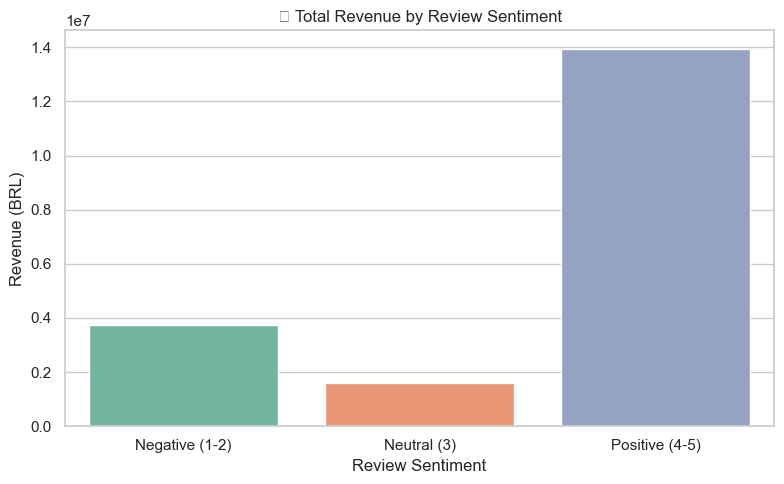

In [21]:
# 📊 6️⃣ Bar Chart: Total Revenue by Sentiment
plt.figure(figsize=(8,5))
sns.barplot(data=sentiment_revenue, x='review_sentiment', y='sum', palette="Set2")
plt.title("💸 Total Revenue by Review Sentiment")
plt.ylabel("Revenue (BRL)")
plt.xlabel("Review Sentiment")
plt.tight_layout()
plt.show()


/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_8735/1429427293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_revenue, x='review_sentiment', y='count', palette="Set3")
/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_8735/1429427293.py:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/marissa/miniforge3/envs/ecommerce-bi/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


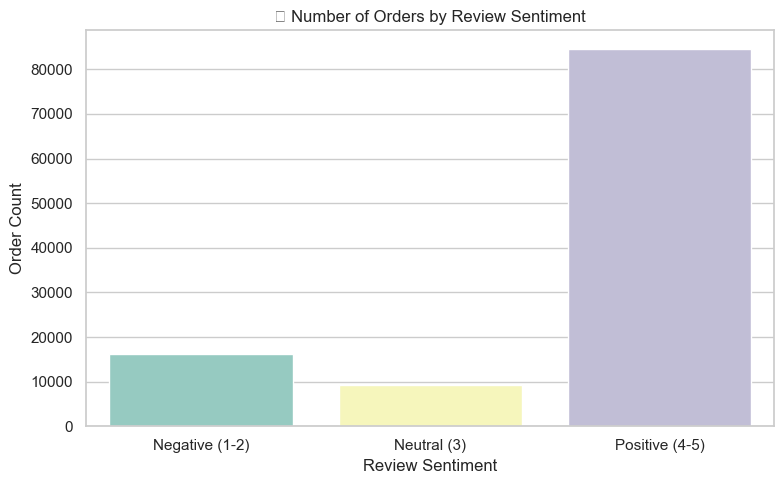

In [23]:

# 📊 7️⃣ Bar Chart: Number of Orders by Sentiment
plt.figure(figsize=(8,5))
sns.barplot(data=sentiment_revenue, x='review_sentiment', y='count', palette="Set3")
plt.title("📦 Number of Orders by Review Sentiment")
plt.ylabel("Order Count")
plt.xlabel("Review Sentiment")
plt.tight_layout()
plt.show()


In [26]:

# 📊 8️⃣ Avg & Median Payment by Translated Product Category (Top 15)
category_summary = df.groupby(['product_category_name', 'category_en'])['payment_value'].agg(['count', 'mean', 'median']).reset_index()
category_summary = category_summary.sort_values('mean', ascending=False).head(15)
print(category_summary)

                             product_category_name  \
10                                             pcs   
14                                  telefonia_fixa   
11                     portateis_casa_forno_e_cafe   
0                        agro_industria_e_comercio   
3                               eletrodomesticos_2   
7                                moveis_escritorio   
13                         sinalizacao_e_seguranca   
2                 construcao_ferramentas_seguranca   
5                            instrumentos_musicais   
4                                  eletroportateis   
12   portateis_cozinha_e_preparadores_de_alimentos   
1                                     climatizacao   
8                                    moveis_quarto   
9                                      moveis_sala   
6   moveis_cozinha_area_de_servico_jantar_e_jardim   

                                category_en  count         mean    median  
10                                      PCs    199  1320.08

/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_8735/3502789703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x='category_en', y='mean', palette="coolwarm")
/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_8735/3502789703.py:7: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_8735/3502789703.py:7: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
/Users/marissa/miniforge3/envs/ecommerce-bi/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/marissa/miniforge3/envs/ecommerce-bi/lib/python3.12/site-packages

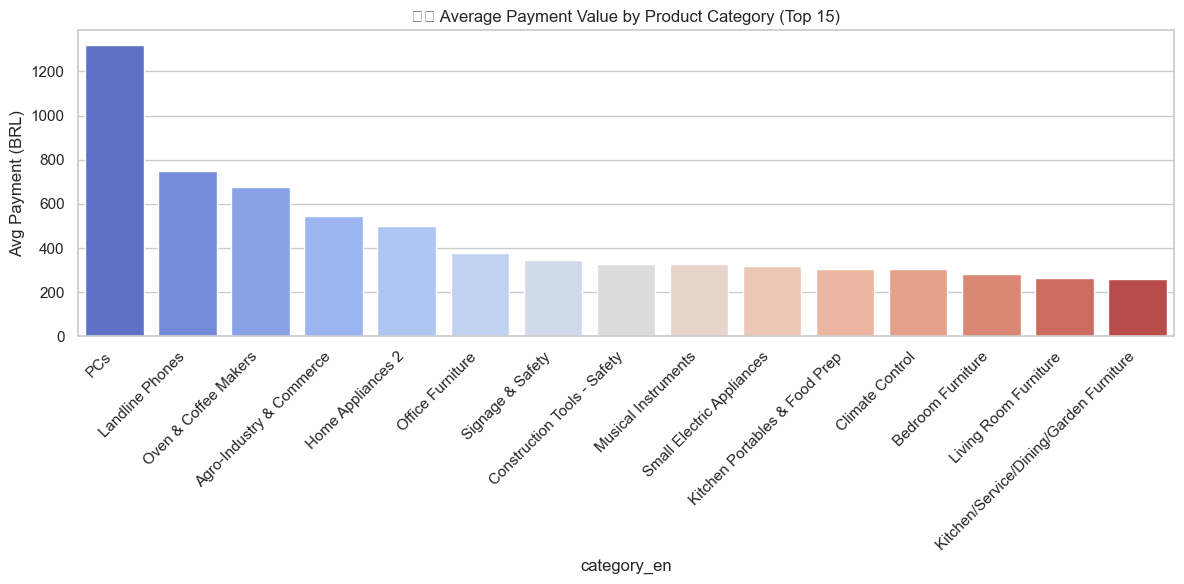

In [25]:

# 📊 9️⃣ Avg Payment by Category (EN)
plt.figure(figsize=(12,6))
sns.barplot(data=category_summary, x='category_en', y='mean', palette="coolwarm")
plt.title("🛍️ Average Payment Value by Product Category (Top 15)")
plt.ylabel("Avg Payment (BRL)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_8735/3507048975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x='category_en', y='median', palette="coolwarm")
/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_8735/3507048975.py:7: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) Arial.
  plt.tight_layout()
/Users/marissa/miniforge3/envs/ecommerce-bi/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


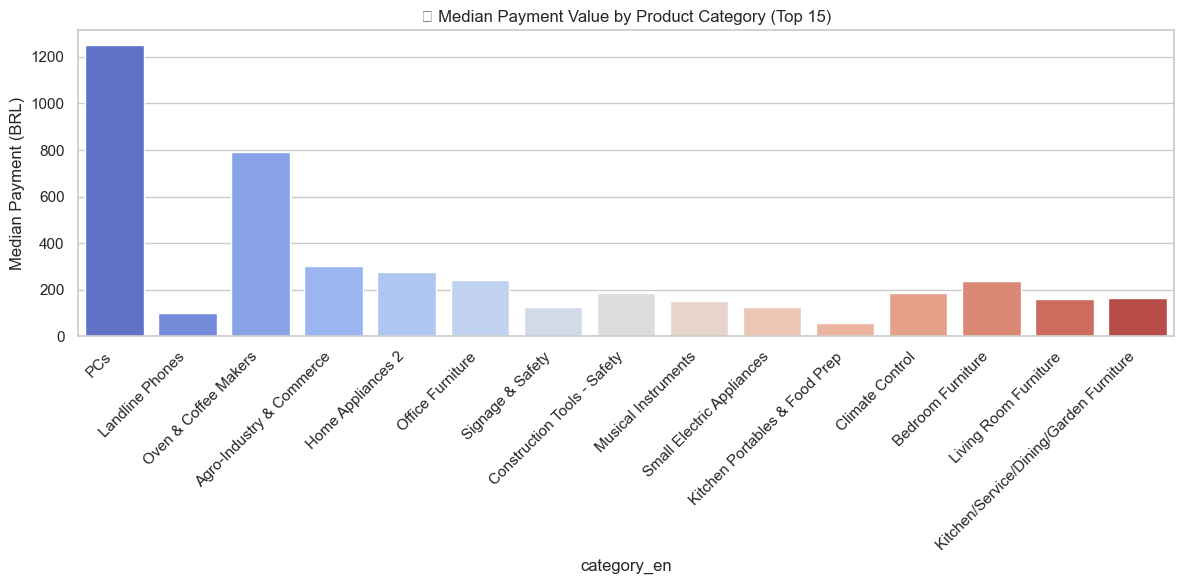

In [27]:

# 📊 🔟 Median Payment by Category (EN)
plt.figure(figsize=(12,6))
sns.barplot(data=category_summary, x='category_en', y='median', palette="coolwarm")
plt.title("💳 Median Payment Value by Product Category (Top 15)")
plt.ylabel("Median Payment (BRL)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_8735/2475130315.py:6: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
/Users/marissa/miniforge3/envs/ecommerce-bi/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


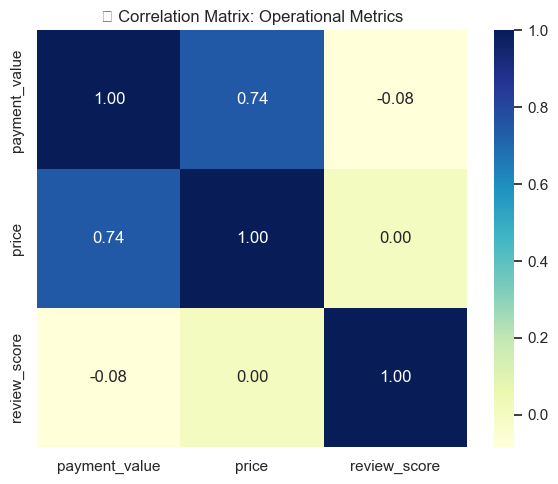

In [28]:

# 🔗 11️⃣ Correlation Matrix
corr_df = df[['payment_value', 'price', 'review_score']].dropna()
plt.figure(figsize=(6,5))
sns.heatmap(corr_df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("🔗 Correlation Matrix: Operational Metrics")
plt.tight_layout()
plt.show()